###*Name: Sayantan Mukherjee 60009220131 D2-2*

In [ ]:
import numpy as np
import cv2
import random
import matplotlib.pyplot as plt


In [ ]:
def load_fashion_mnist_image():
    from tensorflow.keras.datasets import fashion_mnist
    (train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()
    index = random.randint(0, len(test_images)-1)
    return test_images[index]


In [ ]:
def region_growing(image, seed, threshold=15):
    binary_image = np.zeros_like(image)
    x, y = seed
    mean_intensity = image[x, y]
    pixels_to_process = [seed]
    visited = np.zeros_like(image, dtype=bool)
    visited[x, y] = True
    binary_image[x, y] = 255
    neighbors = [(-1, 0), (1, 0), (0, -1), (0, 1)]

    while pixels_to_process:
        curr_x, curr_y = pixels_to_process.pop()

        for dx, dy in neighbors:
            nx, ny = curr_x + dx, curr_y + dy
            if 0 <= nx < image.shape[0] and 0 <= ny < image.shape[1] and not visited[nx, ny]:
                diff = abs(int(image[nx, ny]) - mean_intensity)
                if diff < threshold:
                    visited[nx, ny] = True
                    binary_image[nx, ny] = 255
                    pixels_to_process.append((nx, ny))

    return binary_image


In [ ]:
def region_merging_splitting(image, threshold=15):
    binary_image = np.zeros_like(image)
    regions = []

    for i in range(0, image.shape[0], 10):
        for j in range(0, image.shape[1], 10):
            region = image[i:i+10, j:j+10]
            avg_intensity = np.mean(region)
            regions.append((i, j, avg_intensity, region))

    for i in range(len(regions)):
        for j in range(i + 1, len(regions)):
            if abs(regions[i][2] - regions[j][2]) < threshold:
                region_i = regions[i][3]
                region_j = regions[j][3]

                max_rows = max(region_i.shape[0], region_j.shape[0])
                max_cols = max(region_i.shape[1], region_j.shape[1])

                region_i_resized = cv2.resize(region_i, (max_cols, max_rows))
                region_j_resized = cv2.resize(region_j, (max_cols, max_rows))

                merged_region = np.maximum(region_i_resized, region_j_resized)

                top_left_x = regions[i][0]
                top_left_y = regions[i][1]

                rows_in_image = min(max_rows, image.shape[0] - top_left_x)
                cols_in_image = min(max_cols, image.shape[1] - top_left_y)

                binary_image[top_left_x:top_left_x + rows_in_image, top_left_y:top_left_y + cols_in_image] = merged_region[:rows_in_image, :cols_in_image]

    return binary_image


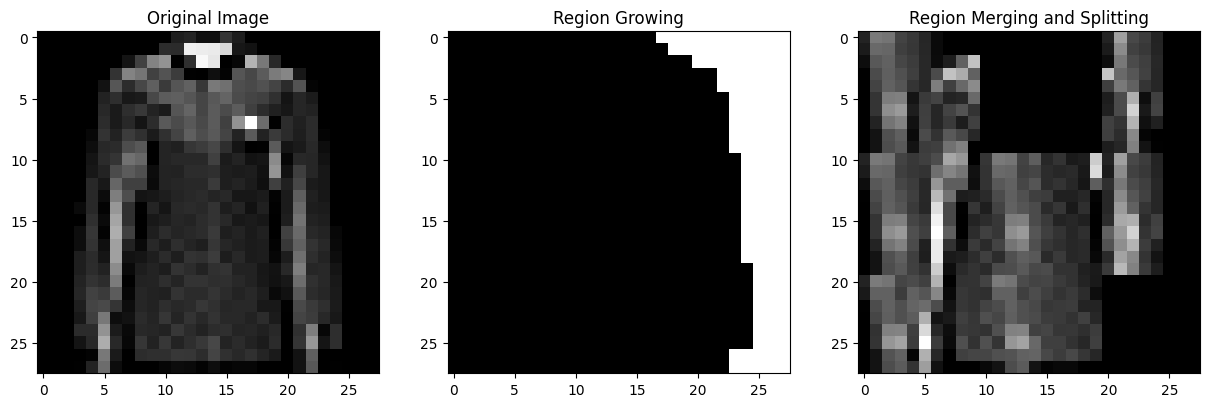

In [ ]:
image = load_fashion_mnist_image()
seed = (random.randint(0, image.shape[0]-1), random.randint(0, image.shape[1]-1))

region_grown_image = region_growing(image, seed)
region_merged_image = region_merging_splitting(image)

plt.figure(figsize=(15, 5))
plt.subplot(1, 3, 1)
plt.imshow(image, cmap='gray')
plt.title("Original Image")
plt.subplot(1, 3, 2)
plt.imshow(region_grown_image, cmap='gray')
plt.title("Region Growing")
plt.subplot(1, 3, 3)
plt.imshow(region_merged_image, cmap='gray')
plt.title("Region Merging and Splitting")
plt.show()


##*Conclusion:*

In this assignment, we successfully developed a Python program to manipulate images from the Fashion MNIST digits dataset using OpenCV. The core tasks of the assignment included implementing two key operations: region growing and region merging/splitting.

###*Region Growing:*
We initiated the process from a seed pixel and grew a region based on intensity differences between neighboring pixels. The region was extracted and highlighted in white in the output image. This operation demonstrated how a region in an image can be expanded based on predefined intensity thresholds, mimicking a region-based segmentation technique.

###*Region Merging and Splitting:*
 We divided the image into smaller non-overlapping regions (10x10 blocks) and calculated the average intensity for each region. When two regions had similar intensity values, they were merged. This operation showed the effectiveness of merging adjacent similar regions to form larger homogeneous areas. If the regions did not match the threshold, they remained separate, demonstrating basic segmentation techniques based on intensity similarities.